<a href="https://colab.research.google.com/github/uncomforming/selflearning/blob/main/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E6%B3%95%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pillow ipython scipy mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.tree import export_graphviz
import graphviz

     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=0a79b1fb9af4967d543064f714936763e893e3440599ada8c1af4674e6fb71e0
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


Text(0, 0.5, 'Feature1')

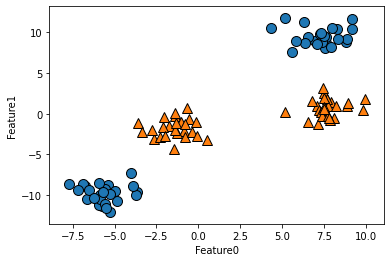

In [2]:
X,y=make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0, 0.5, 'Feature1')

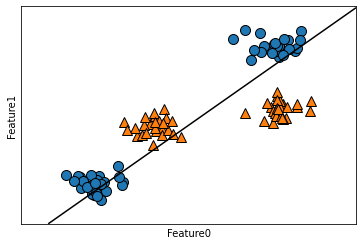

In [3]:
#決定境界を線形SVMを用いて作成
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0.5, 0, 'feature1**2')

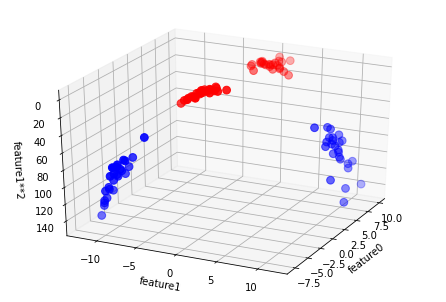

In [4]:
#2番目の特徴量を2乗
X_new=np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure=plt.figure()
#3Dで可視化
ax=Axes3D(figure,elev=-152,azim=-26)
#y=0の点をプロットしてy=1の点をプロット
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 0, 'feature1**2')

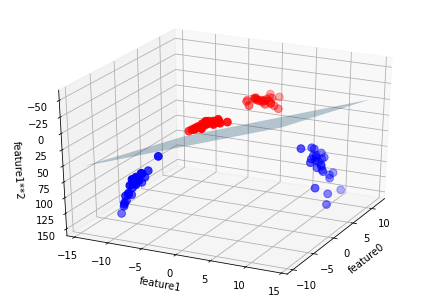

In [5]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
#線形決定境界を描写
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)
XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",cmap=mglearn.cm2,s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

Text(0, 0.5, 'Feature1')

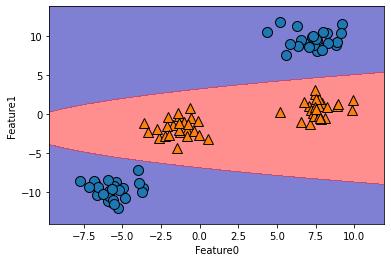

In [6]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
#上のコードで作成した決定境界をもとに2つの特徴量の関数として表示

**カーネルトリック**
非線形の特徴量をデータ表現に加えることにより線形モデルが強力になる
しかし、特徴量が増えすぎると計算量が大きくなり、どの特徴量を加えるべきかもわからない。
この大なった計算量を計算せずに高次元空間でのクラス分類器を学習させる数学的トリックをカーネルトリックと呼ぶ


Text(0, 0.5, 'Feature1')

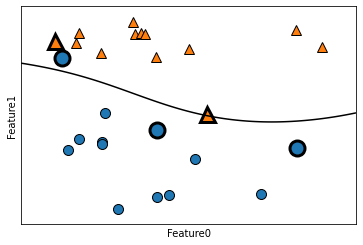

In [7]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#サポートベクタをプロット
sv=svm.support_vectors_
#サポートベクタのクラスラベルをdual_coef_の正負で
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

SVMパラメータの調整

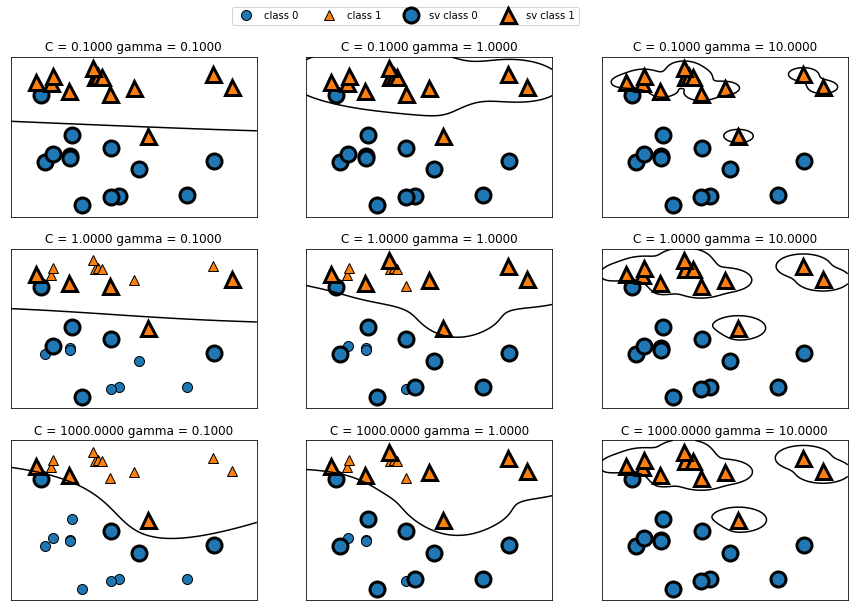

In [8]:
fig,axes=plt.subplots(3,3,figsize=(15,10))
for ax ,C in zip(axes,[-1,0,3]):
  for a,gamma in zip(ax,range(-1,2)):
    mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],
                 ncol=4,loc=(.9,1.2))

In [13]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svc=SVC()
svc.fit(X_train,y_train)
print(f"訓練セットに対する精度{svc.score(X_train,y_train):.2f}")
print(f"テストセットに対する精度{svc.score(X_test,y_test):.2f}")

訓練セットに対する精度0.90
テストセットに対する精度0.94


Text(0, 0.5, 'Feature magnitude')

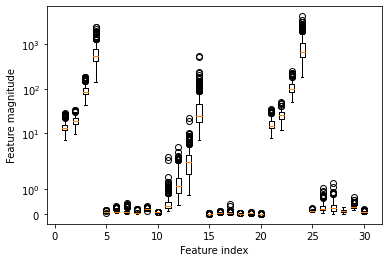

In [15]:
plt.boxplot(X_train,manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# カーネル法を用いたSVMのメリットデメリット
メリットとしては様々なデータセットに対して強力に機能する点がある。データの特徴量の数量や大きさにかかわらず複雑な決定境界の生成が可能。
しかし、反面サンプル数が大きくなりすぎるとうまく機能しないことが多い。
また、データの前処理やパラメータ設定などを慎重に行う必要があることも問題点である。また、モデルの検証や予測の理解が難しいのも課題である。
カーネル法を用いたSVMで重要なパラメータは正則化パラメータのCとカーネルの選択、カーネル固有のパラメータである。
カーネルはRBF（今回使ったもの）以外にもある。RBFカーネルのパラメータとしてはガウシアンカーネルの幅を決めるgammaだけである。
gammmaとCのパラメータはともにモデルの複雑さを表すパラメータであり、強い相関関係を持つため同時に調整する必要がある。
